# Limpieza del dataset

## Carga de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os
from scipy import stats
from sklearn.preprocessing import LabelEncoder

## Limpieza de training

In [2]:
#Training Values Path
TrainingValuesPath = "C:\\Users\\josea\\Desktop\\Concurso\\TrainingValues.csv"
# Leer el archivo CSV utilizando Pandas
TrainingValues= pd.read_csv(TrainingValuesPath)
pd.set_option("display.max_rows", None, "display.max_columns", None) 
TrainingValues.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


**Limpieza de variables numéricas del TrainingValues**, voy a crear una variable que almacene las numericas para visualizarlas inicialmente.

In [3]:
variables_numericas_training = TrainingValues.select_dtypes(include='number')
variables_numericas_training.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


En amount_tsh veo que los valores se acumulan en el 3ºQ(mucha asimetría). En gps_height,longitude y latitude veo sensato que existan negativos debido a que son variables con valores de altura y el agua puede estar bajo tierra. Me llama la atención que haya valores de población tan bajos pero entiendo que en Tanzania haya poblaciones con pocos habitantes. No me cuadra que construction_year tenga valores , ese dato está mal.Por otro lado district_code y region_code en una primera pasada me cuadraron bastante como categóricas por los pocos valores que tienen pero las voy a dejar como numéricas.

In [4]:
variables_numericas_training.nunique()

id                   59400
amount_tsh              98
gps_height            2428
longitude            57516
latitude             57517
num_private             65
region_code             27
district_code           20
population            1049
construction_year       55
dtype: int64

Voy a comprobar los valores de construction_year para ver esos 0 extraños.

In [5]:
unique_values = TrainingValues['construction_year'].value_counts()
# Calcular el porcentaje que representa cada valor
percentages = (unique_values / len(TrainingValues)) * 100
# Combinar los valores únicos y los porcentajes en un DataFrame
construction_year_stats = pd.DataFrame({'Construction_Year': unique_values.index, 'Count': unique_values, 'Percentage': percentages})
# Ordenar el DataFrame por año de construcción
construction_year_stats = construction_year_stats.sort_values(by='Construction_Year')
#print(construction_year_stats)

Hay un 35% de valores 0, voy a pasarlos a Nan para imputarlos luego

In [6]:
# Reemplazar los ceros en 'construction_year' por NaN
variables_numericas_training['construction_year'] = variables_numericas_training['construction_year'].replace(0, float('nan'))
# Calcular el recuento de NaN por columna
recuento_nan_por_columna = variables_numericas_training.isna().sum()
# Mostrar el recuento de NaN por columna
print(recuento_nan_por_columna)

id                       0
amount_tsh               0
gps_height               0
longitude                0
latitude                 0
num_private              0
region_code              0
district_code            0
population               0
construction_year    20709
dtype: int64


Voy a imputar los 0 por la media

In [7]:
# Calcular la media de la columna 'construction_year'
media_construction_year = variables_numericas_training['construction_year'].mean()
# Imputar los valores NaN en 'construction_year' con la media
variables_numericas_training['construction_year'] = variables_numericas_training['construction_year'].fillna(media_construction_year)
variables_numericas_training.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1996.814686
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,10.065781
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,1960.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,1996.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1996.814686
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


Ahora vemos que el mínimo es otro en construction_year. Tras esto voy a comprobar la asimetría de las variables numéricas de training.

In [8]:
variables_numericas_training.select_dtypes(include=np.number).apply(lambda x: x.skew())

id                    0.002623
amount_tsh           57.807800
gps_height            0.462402
longitude            -4.191046
latitude             -0.152037
num_private          91.933750
region_code           3.173818
district_code         3.962045
population           12.660714
construction_year    -0.906320
dtype: float64

Veo mucha asimetría en amount_tsh num_private y population, usaré una función con la que poder arreglarlo. Pero previamente voy a visualizar con un diagrama de barras la distribución de estas.

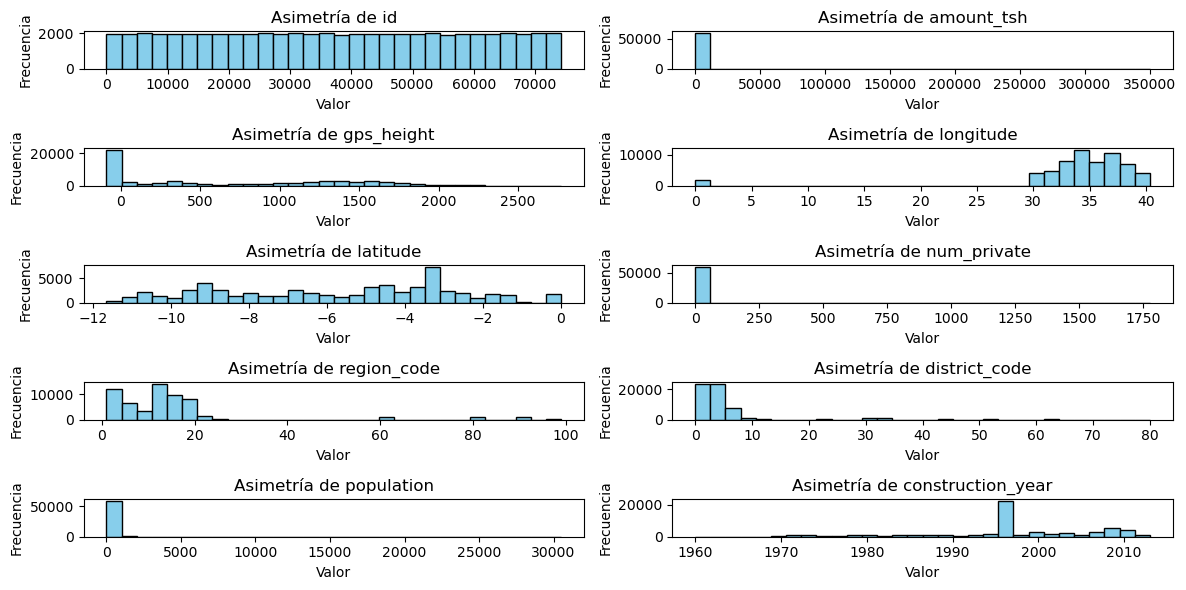

In [9]:
# Crear un subplot con el número de filas y columnas según la cantidad de variables numéricas
num_variables = len(variables_numericas_training.columns)
num_filas = (num_variables + 1) // 2  # División entera para redondear hacia arriba
num_columnas = 2
# Crear el subplot
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(12, 6))
# Aplanar el eje y para facilitar la iteración
axs = axs.ravel()
# Iterar sobre las columnas numéricas y trazar el histograma de asimetría
for i, columna in enumerate(variables_numericas_training.columns):
    axs[i].hist(variables_numericas_training[columna].dropna(), bins=30, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Asimetría de {columna}')
    axs[i].set_xlabel('Valor')
    axs[i].set_ylabel('Frecuencia')
# Ajustar la disposición para evitar solapamientos
plt.tight_layout()
plt.show()

Voy a usar 2 funciones para ver si puedo solucionar el problema se la asimetría.

In [10]:
def winsorize_with_pandas(s, limits):
    """
    s : pd.Series
        Series to winsorize
    limits : tuple of float
        Tuple of the percentages to cut on each side of the array, 
        with respect to the number of unmasked data, as floats between 0. and 1
    """
    return s.clip(lower=s.quantile(limits[0], interpolation='lower'), 
                  upper=s.quantile(1-limits[1], interpolation='higher'))

Con esta función voy a winsorizar con pandas, en concreto la función establece 2 quartiles para identificar outliers a partir de estos. Y con la función siguiente voy a gestionar los outliers. La función identifica los valores atípicos utilizando criterios basados en la asimetría de la distribución y el rango intercuartílico. Luego, calcula la proporción de valores atípicos en la cola inferior y superior de la distribución. Dependiendo del tipo de gestión especificado (en este caso 'winsor'), la función devuelve información sobre los valores atípicos, los recorta utilizando winsorización o los reemplaza por NaN. Esta función se aplica a todas las columnas numéricas del DataFrame para gestionar los valores atípicos de manera sistemática.

In [11]:
## Función para gestionar outliers
def gestiona_outliers(col,clas = 'winsor'):
     # Condición de asimetría y aplicación de criterio 1 según el caso
     if abs(col.skew()) < 1:
        criterio1 = abs((col-col.mean())/col.std())>3
     else:
        criterio1 = abs((col-col.median())/stats.median_abs_deviation(col))>6 ## Cambio mad por median_abs_deviation!!     
     # Calcular primer cuartil     
     q1 = col.quantile(0.25)  
     # Calcular tercer cuartil  
     q3 = col.quantile(0.75)
     # Calculo de IQR
     IQR=q3-q1
     # Calcular criterio 2 (general para cualquier asimetría)
     criterio2 = (col<(q1 - 3*IQR))|(col>(q3 + 3*IQR))
     lower = col[criterio1&criterio2&(col<q1)].count()/col.dropna().count()
     upper = col[criterio1&criterio2&(col>q3)].count()/col.dropna().count()
     # Salida según el tipo deseado
     if clas == 'check':
            return(lower*100,upper*100,(lower+upper)*100)
     elif clas == 'winsor':
            return(winsorize_with_pandas(col,(lower,upper)))
     elif clas == 'miss':
            print('\n MissingAntes: ' + str(col.isna().sum()))
            col.loc[criterio1&criterio2] = np.nan
            print('MissingDespues: ' + str(col.isna().sum()) +'\n')
            return(col)
# Aplicar winsorización a variables_numericas
variables_numericas_training_winsor = variables_numericas_training.apply(lambda x: gestiona_outliers(x, clas='winsor'))
#Veo de nuevo la asimetría tras la winsorización
variables_numericas_training_winsor.select_dtypes(include=np.number).apply(lambda x: x.skew())

id                   0.002623
amount_tsh           1.381347
gps_height           0.462402
longitude           -4.191046
latitude            -0.152037
num_private          8.688173
region_code          2.442720
district_code        2.771740
population           1.827281
construction_year   -0.864119
dtype: float64

La asimetría ha bajado bastante pero algunas siguen estando fuera del rango -1,1. num_private está altísima 

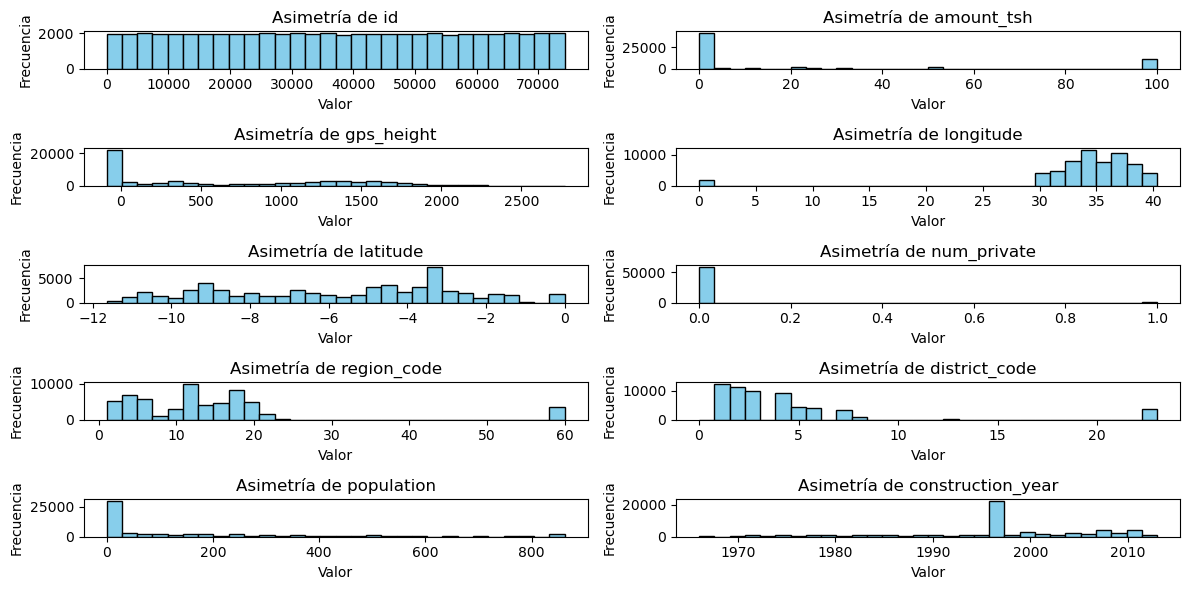

In [12]:
# Crear un subplot con el número de filas y columnas según la cantidad de variables numéricas
num_variables = len(variables_numericas_training_winsor.columns)
num_filas = (num_variables + 1) // 2  # División entera para redondear hacia arriba
num_columnas = 2
# Crear el subplot
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(12, 6))
# Aplanar el eje y para facilitar la iteración
axs = axs.ravel()
# Iterar sobre las columnas numéricas y trazar el histograma de asimetría
for i, columna in enumerate(variables_numericas_training_winsor.columns):
    axs[i].hist(variables_numericas_training_winsor[columna].dropna(), bins=30, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Asimetría de {columna}')
    axs[i].set_xlabel('Valor')
    axs[i].set_ylabel('Frecuencia')
# Ajustar la disposición para evitar solapamientos
plt.tight_layout()
plt.show()

En la representación gráfica no se nota mucho(en la que se ve algo es en district_code) pero por los valores generados la asimetría es diferente. Me dispongo a hacer un describe de los datos para comparar con los de antes de la winsorización.

In [14]:
variables_numericas_training_winsor.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.00000,59400.000000,59400.000000,59400.000000
mean,37115.131768,22.120149,668.297239,34.077427,-5.706033e+00,0.012744,14.13931,4.560976,144.451953,1996.834736
std,21453.128371,38.969677,693.116350,6.567432,2.946019e+00,0.112169,13.09227,5.215934,219.509982,9.999459
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.00000,0.000000,0.000000,1966.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.00000,2.000000,0.000000,1996.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.00000,3.000000,25.000000,1996.814686
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.00000,5.000000,215.000000,2004.000000
max,74247.000000,100.000000,2770.000000,40.345193,-2.000000e-08,1.000000,60.00000,23.000000,862.000000,2013.000000


Las desviaciones de num_private,region_code,district_code,population y construction_year han mejorado.

In [15]:
variables_numericas_training_winsor.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.00000,59400.000000,59400.000000,59400.000000
mean,37115.131768,22.120149,668.297239,34.077427,-5.706033e+00,0.012744,14.13931,4.560976,144.451953,1996.834736
std,21453.128371,38.969677,693.116350,6.567432,2.946019e+00,0.112169,13.09227,5.215934,219.509982,9.999459
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.00000,0.000000,0.000000,1966.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.00000,2.000000,0.000000,1996.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.00000,3.000000,25.000000,1996.814686
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.00000,5.000000,215.000000,2004.000000
max,74247.000000,100.000000,2770.000000,40.345193,-2.000000e-08,1.000000,60.00000,23.000000,862.000000,2013.000000


Hemos bajado la desviación.

A mi aprecer ya están tratadas las variables numéricas del TrainingValues.

**Limpieza de las variables categóricas de TrainingValues**

Voy a ver el tipo de dato del resto de variables, veo que son object y voy a crear una variable y pasarla a tipo category para que ocupen menos.

In [16]:
#print(TrainingValues.dtypes)

In [17]:
variables_object= TrainingValues.select_dtypes(include=['object'])
# Convertir las columnas seleccionadas a tipo category
variables_categoricas_training = variables_object.astype('category')
#print("\nTipos de datos después de la conversión:")
print(variables_categoricas_training.dtypes)

date_recorded            category
funder                   category
installer                category
wpt_name                 category
basin                    category
subvillage               category
region                   category
lga                      category
ward                     category
public_meeting           category
recorded_by              category
scheme_management        category
scheme_name              category
permit                   category
extraction_type          category
extraction_type_group    category
extraction_type_class    category
management               category
management_group         category
payment                  category
payment_type             category
water_quality            category
quality_group            category
quantity                 category
quantity_group           category
source                   category
source_type              category
source_class             category
waterpoint_type          category
waterpoint_typ

In [18]:
variables_categoricas_training.head()

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,2011-03-14,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,True,GeoData Consultants Ltd,VWC,Roman,False,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,2013-03-06,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,Serengeti,Natta,NaN,GeoData Consultants Ltd,Other,NaN,True,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,2013-02-25,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,2013-01-28,Unicef,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,Nanyumbu,True,GeoData Consultants Ltd,VWC,NaN,True,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,2011-07-13,Action In A,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,Karagwe,Nyakasimbi,True,GeoData Consultants Ltd,NaN,NaN,True,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


Por otro lado voy a imputar el dataset de las variables categóricas del training por la moda.

In [19]:
variables_categoricas_training = variables_categoricas_training.fillna(variables_categoricas_training.mode().iloc[0])
variables_categoricas_training.head()

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,2011-03-14,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,True,GeoData Consultants Ltd,VWC,Roman,False,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,2013-03-06,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,Serengeti,Natta,True,GeoData Consultants Ltd,Other,K,True,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,2013-02-25,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,2013-01-28,Unicef,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,Nanyumbu,True,GeoData Consultants Ltd,VWC,K,True,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,2011-07-13,Action In A,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,Karagwe,Nyakasimbi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


Voy a visualizar las que tienen menos de 21 valores diferentes para ver las distribuciones(cuando intentaba visualizar todas jupyter se me cerraba).

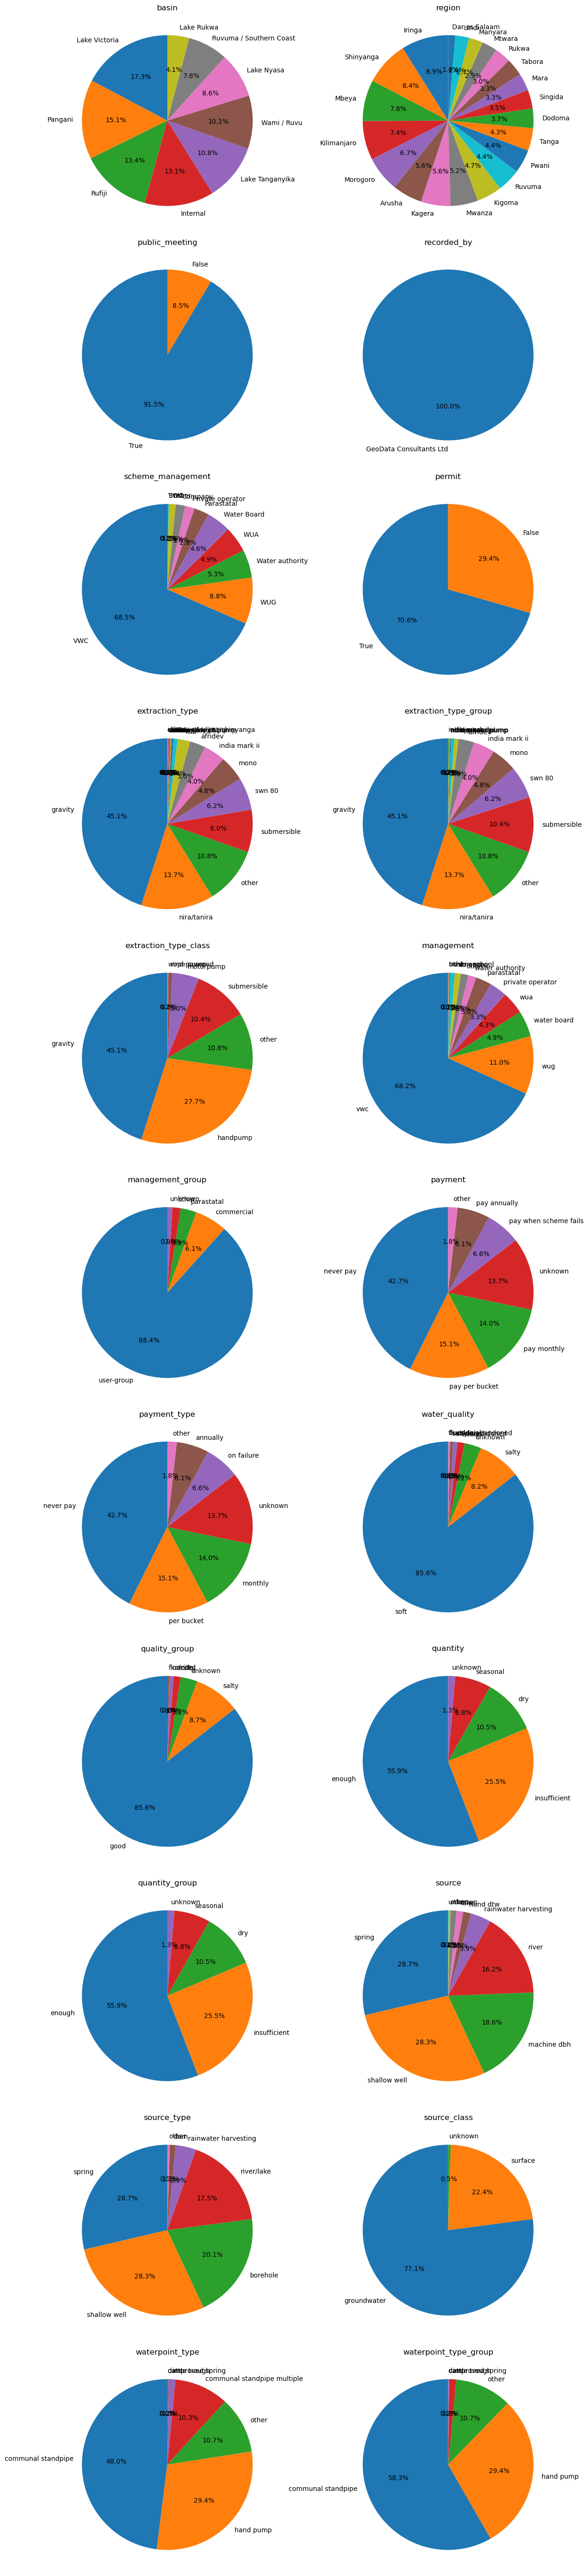

In [20]:
# Seleccionar las columnas con 21 o menos valores únicos
columnas_interesantes = [col for col in variables_categoricas_training.columns if variables_categoricas_training[col].nunique() <= 21]
# Configurar la disposición de los subplots
num_subplots = len(columnas_interesantes)
num_filas = (num_subplots // 2) + (num_subplots % 2)
fig, axes = plt.subplots(num_filas, 2, figsize=(12, num_filas * 5))
# Iterar sobre las columnas seleccionadas y crear diagramas de sectores para cada una
for i, col in enumerate(columnas_interesantes):
    fila = i // 2
    columna = i % 2
    ax = axes[fila, columna] 
    # Calcular el conteo de valores únicos en la columna
    conteo_valores = variables_categoricas_training[col].value_counts()
    # Crear el diagrama de sectores
    ax.pie(conteo_valores, labels=conteo_valores.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(col)
# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

Creo que es complicado encontrar un criterio para crear particiones comunes de cada variable, lo que voy a hacer es lo siguiente, voy a hacer un label encoder de todas con el siguiente criterio. Quiero quedarme con los 9 valores más grandes de cada categoria y el resto será rest (si la variable tiene menos de 9 valores pues una columna por valor), no se me ocurre otra manera de no crear muchas dummys sin que mi pc no me lo ejecute.

In [21]:
# Crear un DataFrame para almacenar los resultados
variables_categoricas_training_le = pd.DataFrame(index=variables_categoricas_training.index)
# Iterar sobre cada columna categórica
for col in variables_categoricas_training.columns:
    if col != 'status_group':  # Excluir la variable objetivo
        # Codificar la columna con LabelEncoder
        le = LabelEncoder()
        variables_categoricas_training_le[col] = le.fit_transform(variables_categoricas_training[col])
        # Calcular el porcentaje de cada valor
        conteo_valores = variables_categoricas_training[col].value_counts(normalize=True)
        # Seleccionar los 9 valores con mayor porcentaje y el resto
        top_valores = conteo_valores.head(9).index
        resto_valores = conteo_valores[~conteo_valores.index.isin(top_valores)].index
        # Crear nuevas columnas para los 9 valores principales y la columna 'rest'
        for i, valor in enumerate(top_valores):
            variables_categoricas_training_le[f'{col}_top_{i+1}'] = (variables_categoricas_training[col] == valor).astype(int)
        variables_categoricas_training_le[f'{col}_rest'] = (variables_categoricas_training[col].isin(resto_valores)).astype(int)
# Eliminar las columnas que no contienen ni "top" ni "rest", excepto las columnas de la variable objetivo
variables_categoricas_training_le = variables_categoricas_training_le.filter(like='top').join(variables_categoricas_training_le.filter(like='rest')).join(variables_categoricas_training_le.filter(like='status_group'))
# Mostrar el resultado
variables_categoricas_training_le.head()

C:\Users\josea\AppData\Local\Temp\ipykernel_23104\3561415264.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  variables_categoricas_training_le[f'{col}_top_{i+1}'] = (variables_categoricas_training[col] == valor).astype(int)
C:\Users\josea\AppData\Local\Temp\ipykernel_23104\3561415264.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  variables_categoricas_training_le[f'{col}_top_{i+1}'] = (variables_categoricas_training[col] == valor).astype(int)
C:\Users\josea\AppData\Local\Temp\ipykernel_23104\3561415264.py:17: Performa

C:\Users\josea\AppData\Local\Temp\ipykernel_23104\3561415264.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  variables_categoricas_training_le[f'{col}_top_{i+1}'] = (variables_categoricas_training[col] == valor).astype(int)
C:\Users\josea\AppData\Local\Temp\ipykernel_23104\3561415264.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  variables_categoricas_training_le[f'{col}_top_{i+1}'] = (variables_categoricas_training[col] == valor).astype(int)
C:\Users\josea\AppData\Local\Temp\ipykernel_23104\3561415264.py:16: Performa

,date_recorded_top_1,date_recorded_top_2,date_recorded_top_3,date_recorded_top_4,date_recorded_top_5,date_recorded_top_6,date_recorded_top_7,date_recorded_top_8,date_recorded_top_9,funder_top_1,funder_top_2,funder_top_3,funder_top_4,funder_top_5,funder_top_6,funder_top_7,funder_top_8,funder_top_9,installer_top_1,installer_top_2,installer_top_3,installer_top_4,installer_top_5,installer_top_6,installer_top_7,installer_top_8,installer_top_9,wpt_name_top_1,wpt_name_top_2,wpt_name_top_3,wpt_name_top_4,wpt_name_top_5,wpt_name_top_6,wpt_name_top_7,wpt_name_top_8,wpt_name_top_9,basin_top_1,basin_top_2,basin_top_3,basin_top_4,basin_top_5,basin_top_6,basin_top_7,basin_top_8,basin_top_9,subvillage_top_1,subvillage_top_2,subvillage_top_3,subvillage_top_4,subvillage_top_5,subvillage_top_6,subvillage_top_7,subvillage_top_8,subvillage_top_9,region_top_1,region_top_2,region_top_3,region_top_4,region_top_5,region_top_6,region_top_7,region_top_8,region_top_9,lga_top_1,lga_top_2,lga_top_3,lga_top_4,lga_top_5,lga_top_6,lga_top_7,lga_top_8,lga_top_9,ward_top_1,ward_top_2,ward_top_3,ward_top_4,ward_top_5,ward_top_6,ward_top_7,ward_top_8,ward_top_9,public_meeting_top_1,public_meeting_top_2,recorded_by_top_1,scheme_management_top_1,scheme_management_top_2,scheme_management_top_3,scheme_management_top_4,scheme_management_top_5,scheme_management_top_6,scheme_management_top_7,scheme_management_top_8,scheme_management_top_9,scheme_name_top_1,scheme_name_top_2,scheme_name_top_3,scheme_name_top_4,scheme_name_top_5,scheme_name_top_6,scheme_name_top_7,scheme_name_top_8,scheme_name_top_9,permit_top_1,permit_top_2,extraction_type_top_1,extraction_type_top_2,extraction_type_top_3,extraction_type_top_4,extraction_type_top_5,extraction_type_top_6,extraction_type_top_7,extraction_type_top_8,extraction_type_top_9,extraction_type_group_top_1,extraction_type_group_top_2,extraction_type_group_top_3,extraction_type_group_top_4,extraction_type_group_top_5,extraction_type_group_top_6,extraction_type_group_top_7,extraction_type_group_top_8,extraction_type_group_top_9,extraction_type_class_top_1,extraction_type_class_top_2,extraction_type_class_top_3,extraction_type_class_top_4,extraction_type_class_top_5,extraction_type_class_top_6,extraction_type_class_top_7,management_top_1,management_top_2,management_top_3,management_top_4,management_top_5,management_top_6,management_top_7,management_top_8,management_top_9,management_group_top_1,management_group_top_2,management_group_top_3,management_group_top_4,management_group_top_5,payment_top_1,payment_top_2,payment_top_3,payment_top_4,payment_top_5,payment_top_6,payment_top_7,payment_type_top_1,payment_type_top_2,payment_type_top_3,payment_type_top_4,payment_type_top_5,payment_type_top_6,payment_type_top_7,water_quality_top_1,water_quality_top_2,water_quality_top_3,water_quality_top_4,water_quality_top_5,water_quality_top_6,water_quality_top_7,water_quality_top_8,quality_group_top_1,quality_group_top_2,quality_group_top_3,quality_group_top_4,quality_group_top_5,quality_group_top_6,quantity_top_1,quantity_top_2,quantity_top_3,quantity_top_4,quantity_top_5,quantity_group_top_1,quantity_group_top_2,quantity_group_top_3,quantity_group_top_4,quantity_group_top_5,source_top_1,source_top_2,source_top_3,source_top_4,source_top_5,source_top_6,source_top_7,source_top_8,source_top_9,source_type_top_1,source_type_top_2,source_type_top_3,source_type_top_4,source_type_top_5,source_type_top_6,source_type_top_7,source_class_top_1,source_class_top_2,source_class_top_3,waterpoint_type_top_1,waterpoint_type_top_2,waterpoint_type_top_3,waterpoint_type_top_4,waterpoint_type_top_5,waterpoint_type_top_6,waterpoint_type_top_7,waterpoint_type_group_top_1,waterpoint_type_group_top_2,waterpoint_type_group_top_3,waterpoint_type_group_top_4,waterpoint_type_group_top_5,waterpoint_type_group_top_6,date_recorded_rest,funder_rest,installer_rest,wpt_name_rest,basin_rest,subvillage_rest,region_rest,lga_rest,ward_rest,public_meeting_rest,recorded_by_rest,scheme_man

Parece que ha funcionado el label encoder.

**Me dispongo a unir categorias y numericas. y guardar en un .csv**

In [22]:
# Combinar los DataFrames variables_numericas_training_winsor y variables_categoricas_training_le
traininglimpio = pd.concat([variables_numericas_training_winsor, variables_categoricas_training_le], axis=1)
# Mostrar las primeras filas del nuevo DataFrame combinado
traininglimpio.head()
# Guardar el DataFrame en un archivo CSV con el nombre "traininglimpio.csv"
#traininglimpio.to_csv('traininglimpio.csv')

## Limpieza de test

Me dispongo a seguir el mismo proceso con el test. Al test no tengo que meterle la variable objetivo, voy a hacer el proceso más rápido ya que previamente vi que era una partición del training y había muchas cosas iguales(el problema de construction_year...)

In [23]:
#Test Values Path
TestValuesPath = "C:\\Users\\josea\\Desktop\\Concurso\\TestValues.csv"
# Leer el archivo CSV utilizando Pandas
TestValues= pd.read_csv(TestValuesPath)
pd.set_option("display.max_rows", None, "display.max_columns", None) 
TestValues.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


**Limpieza de las variables numéricas del test**

Creo la variable numérica de las columnas del test.

In [25]:
variables_numericas_test = TestValues.select_dtypes(include='number')
variables_numericas_test.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,322.826983,655.147609,34.061605,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1289.708350
std,21359.364833,2510.968644,691.261185,6.593034,2.940803e+00,8.167910,17.191329,9.673842,469.499332,955.241087
min,10.000000,0.000000,-57.000000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18727.000000,0.000000,0.000000,33.069455,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37361.500000,0.000000,344.000000,34.901215,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1986.000000
75%,55799.750000,25.000000,1308.000000,37.196594,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


Voy a hacer la imputación de los 0 por la media.

In [26]:
# Calcular la media de 'construction_year' excluyendo los valores cero
media_construction_year = variables_numericas_test[variables_numericas_test['construction_year'] != 0]['construction_year'].mean()
# Imputar los valores cero en 'construction_year' con la media
variables_numericas_test['construction_year'] = variables_numericas_test['construction_year'].replace(0, media_construction_year)
# Verificar los cambios (el mínimo ahora es otro)
#variables_numericas_test.describe()

Compruebo la simetría y paso por las 2 funciones de los outliers.

In [27]:
variables_numericas_test.select_dtypes(include=np.number).apply(lambda x: x.skew())

id                   -0.010584
amount_tsh           43.857861
gps_height            0.497094
longitude            -4.173130
latitude             -0.156238
num_private          50.744510
region_code           3.201174
district_code         3.959339
population            8.217148
construction_year    -0.942969
dtype: float64

In [28]:
def winsorize_with_pandas(s, limits):
    """
    s : pd.Series
        Series to winsorize
    limits : tuple of float
        Tuple of the percentages to cut on each side of the array, 
        with respect to the number of unmasked data, as floats between 0. and 1
    """
    return s.clip(lower=s.quantile(limits[0], interpolation='lower'), 
                  upper=s.quantile(1-limits[1], interpolation='higher'))

In [29]:
## Función para gestionar outliers
def gestiona_outliers(col,clas = 'winsor'):
     # Condición de asimetría y aplicación de criterio 1 según el caso
     if abs(col.skew()) < 1:
        criterio1 = abs((col-col.mean())/col.std())>3
     else:
        criterio1 = abs((col-col.median())/stats.median_abs_deviation(col))>6 ## Cambio mad por median_abs_deviation!!     
     # Calcular primer cuartil     
     q1 = col.quantile(0.25)  
     # Calcular tercer cuartil  
     q3 = col.quantile(0.75)
     # Calculo de IQR
     IQR=q3-q1
     # Calcular criterio 2 (general para cualquier asimetría)
     criterio2 = (col<(q1 - 3*IQR))|(col>(q3 + 3*IQR))
     lower = col[criterio1&criterio2&(col<q1)].count()/col.dropna().count()
     upper = col[criterio1&criterio2&(col>q3)].count()/col.dropna().count()
     # Salida según el tipo deseado
     if clas == 'check':
            return(lower*100,upper*100,(lower+upper)*100)
     elif clas == 'winsor':
            return(winsorize_with_pandas(col,(lower,upper)))
     elif clas == 'miss':
            print('\n MissingAntes: ' + str(col.isna().sum()))
            col.loc[criterio1&criterio2] = np.nan
            print('MissingDespues: ' + str(col.isna().sum()) +'\n')
            return(col)
# Aplicar winsorización a variables_numericas
variables_numericas_test_winsor = variables_numericas_test.apply(lambda x: gestiona_outliers(x, clas='winsor'))
variables_numericas_test_winsor.select_dtypes(include=np.number).apply(lambda x: x.skew())

id                  -0.010584
amount_tsh           1.505701
gps_height           0.497094
longitude           -4.173130
latitude            -0.156238
num_private          8.577557
region_code          2.459640
district_code        2.778529
population           1.870130
construction_year   -0.892801
dtype: float64

In [30]:
variables_numericas_test_winsor.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,50785,0.0,1996,35.290799,-4.059696,0,21,3,321,2012.0
1,51630,0.0,1569,36.656709,-3.309214,0,2,2,300,2000.0
2,17168,0.0,1567,34.767863,-5.004344,0,13,2,500,2010.0
3,45559,0.0,267,38.058046,-9.418672,0,60,23,250,1987.0
4,49871,150.0,1260,35.006123,-10.950412,0,10,3,60,2000.0


Compruebo de nuevo el cambio en la asimetría.Sigue habiendo algunas fuera de rango -1 y 1 pero ha bajado.

A mi aprecer ya están tratadas las variables numéricas del Test Values.

**Limpieza de las variables categóricas del test**

In [31]:
variables_object= TestValues.select_dtypes(include=['object'])
# Convertir las columnas seleccionadas a tipo category
variables_categoricas_test = variables_object.astype('category')
#print("\nTipos de datos después de la conversión:")
#print(variables_categoricas_test.dtypes)

Voy a imputar el dataset de las variables categóricas del training por la moda.

In [32]:
variables_categoricas_test = variables_categoricas_test.fillna(variables_categoricas_test.mode().iloc[0])
#variables_categoricas_test.head()

Voy a crear le mismo diagrama de sectores que hice con las categórias de traingin pero con test

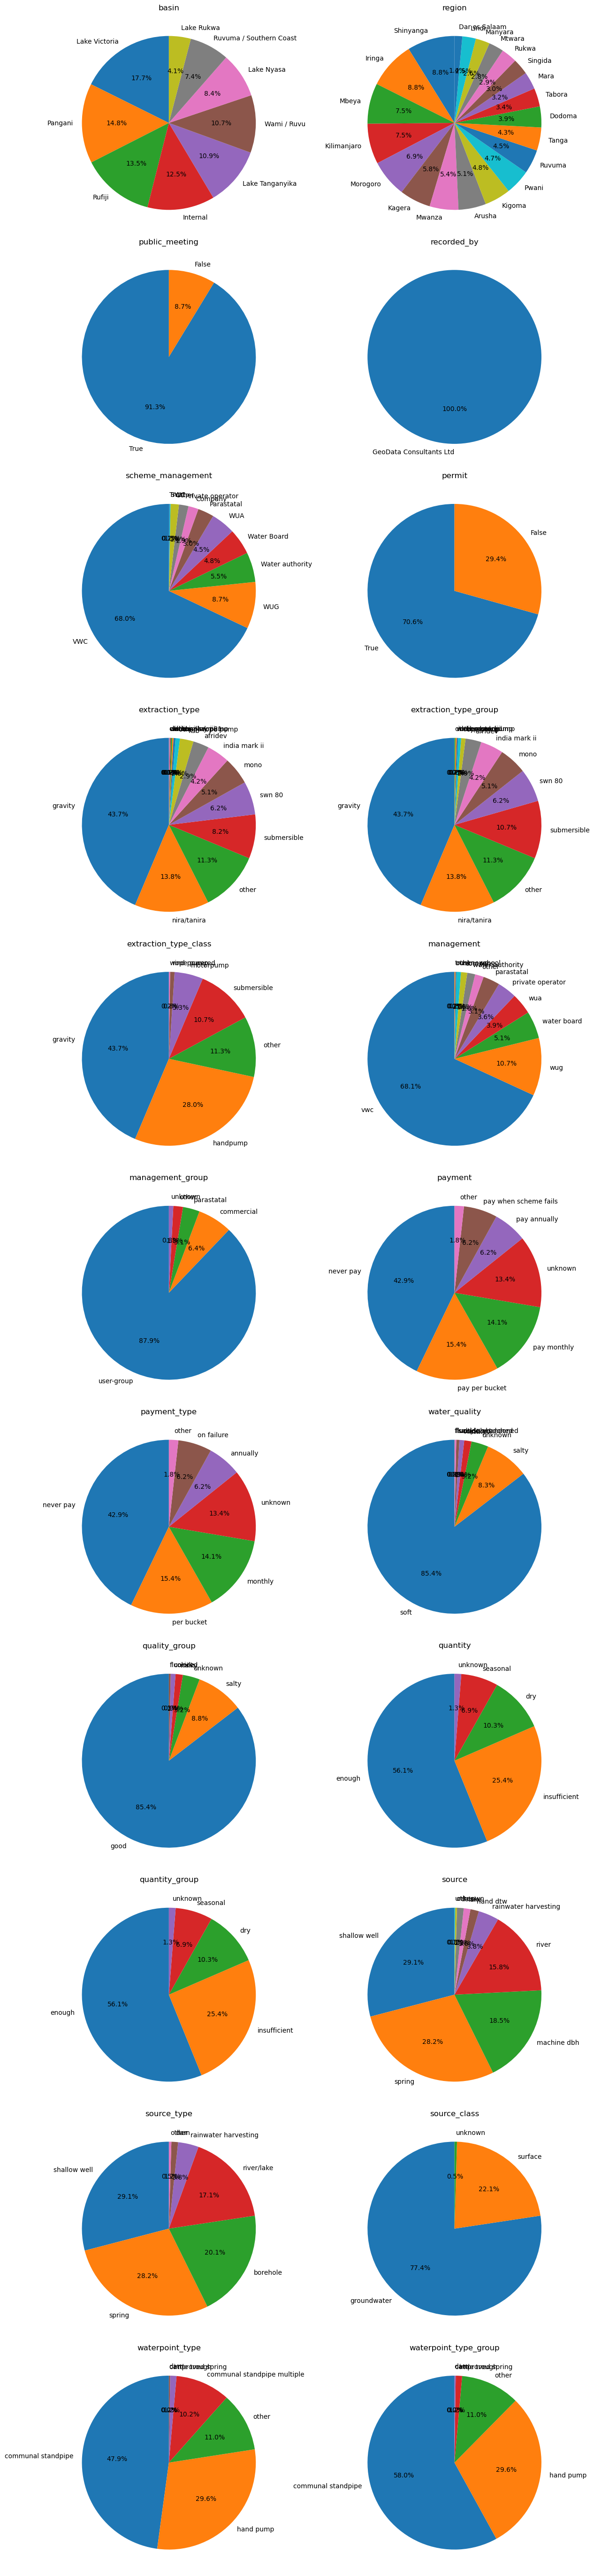

In [33]:
# Seleccionar las columnas con 21 o menos valores únicos
columnas_interesantes = [col for col in variables_categoricas_test.columns if variables_categoricas_test[col].nunique() <= 21]
# Configurar la disposición de los subplots
num_subplots = len(columnas_interesantes)
num_filas = (num_subplots // 2) + (num_subplots % 2)
fig, axes = plt.subplots(num_filas, 2, figsize=(12, num_filas * 5))
# Iterar sobre las columnas seleccionadas y crear diagramas de sectores para cada una
for i, col in enumerate(columnas_interesantes):
    fila = i // 2
    columna = i % 2
    ax = axes[fila, columna]    
    # Calcular el conteo de valores únicos en la columna
    conteo_valores = variables_categoricas_test[col].value_counts()    
    # Crear el diagrama de sectores
    ax.pie(conteo_valores, labels=conteo_valores.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(col)
# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

Voy a generar el mismo tipo de label encoder que hice para el training.

In [34]:
# Crear un DataFrame para almacenar los resultados
variables_categoricas_test_le = pd.DataFrame(index=variables_categoricas_test.index)
# Iterar sobre cada columna categórica
for col in variables_categoricas_test.columns:
    if col != 'status_group':  # Excluir la variable objetivo
        # Codificar la columna con LabelEncoder
        le = LabelEncoder()
        variables_categoricas_test_le[col] = le.fit_transform(variables_categoricas_test[col])
        # Calcular el porcentaje de cada valor
        conteo_valores = variables_categoricas_test[col].value_counts(normalize=True)
        # Seleccionar los 9 valores con mayor porcentaje y el resto
        top_valores = conteo_valores.head(9).index
        resto_valores = conteo_valores[~conteo_valores.index.isin(top_valores)].index
        # Crear nuevas columnas para los 9 valores principales y la columna 'rest'
        for i, valor in enumerate(top_valores):
            variables_categoricas_test_le[f'{col}_top_{i+1}'] = (variables_categoricas_test[col] == valor).astype(int)
        variables_categoricas_test_le[f'{col}_rest'] = (variables_categoricas_test_le[col].isin(resto_valores)).astype(int)
# Eliminar las columnas que no contienen ni "top" ni "rest", excepto las columnas de la variable objetivo
variables_categoricas_test_le = variables_categoricas_test_le.filter(like='top').join(variables_categoricas_test_le.filter(like='rest')).join(variables_categoricas_test_le.filter(like='status_group'))
# Mostrar el resultado
variables_categoricas_test_le.head()

C:\Users\josea\AppData\Local\Temp\ipykernel_23104\380669041.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  variables_categoricas_test_le[f'{col}_top_{i+1}'] = (variables_categoricas_test[col] == valor).astype(int)
C:\Users\josea\AppData\Local\Temp\ipykernel_23104\380669041.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  variables_categoricas_test_le[f'{col}_top_{i+1}'] = (variables_categoricas_test[col] == valor).astype(int)
C:\Users\josea\AppData\Local\Temp\ipykernel_23104\380669041.py:17: PerformanceWarning: DataFra

,date_recorded_top_1,date_recorded_top_2,date_recorded_top_3,date_recorded_top_4,date_recorded_top_5,date_recorded_top_6,date_recorded_top_7,date_recorded_top_8,date_recorded_top_9,funder_top_1,funder_top_2,funder_top_3,funder_top_4,funder_top_5,funder_top_6,funder_top_7,funder_top_8,funder_top_9,installer_top_1,installer_top_2,installer_top_3,installer_top_4,installer_top_5,installer_top_6,installer_top_7,installer_top_8,installer_top_9,wpt_name_top_1,wpt_name_top_2,wpt_name_top_3,wpt_name_top_4,wpt_name_top_5,wpt_name_top_6,wpt_name_top_7,wpt_name_top_8,wpt_name_top_9,basin_top_1,basin_top_2,basin_top_3,basin_top_4,basin_top_5,basin_top_6,basin_top_7,basin_top_8,basin_top_9,subvillage_top_1,subvillage_top_2,subvillage_top_3,subvillage_top_4,subvillage_top_5,subvillage_top_6,subvillage_top_7,subvillage_top_8,subvillage_top_9,region_top_1,region_top_2,region_top_3,region_top_4,region_top_5,region_top_6,region_top_7,region_top_8,region_top_9,lga_top_1,lga_top_2,lga_top_3,lga_top_4,lga_top_5,lga_top_6,lga_top_7,lga_top_8,lga_top_9,ward_top_1,ward_top_2,ward_top_3,ward_top_4,ward_top_5,ward_top_6,ward_top_7,ward_top_8,ward_top_9,public_meeting_top_1,public_meeting_top_2,recorded_by_top_1,scheme_management_top_1,scheme_management_top_2,scheme_management_top_3,scheme_management_top_4,scheme_management_top_5,scheme_management_top_6,scheme_management_top_7,scheme_management_top_8,scheme_management_top_9,scheme_name_top_1,scheme_name_top_2,scheme_name_top_3,scheme_name_top_4,scheme_name_top_5,scheme_name_top_6,scheme_name_top_7,scheme_name_top_8,scheme_name_top_9,permit_top_1,permit_top_2,extraction_type_top_1,extraction_type_top_2,extraction_type_top_3,extraction_type_top_4,extraction_type_top_5,extraction_type_top_6,extraction_type_top_7,extraction_type_top_8,extraction_type_top_9,extraction_type_group_top_1,extraction_type_group_top_2,extraction_type_group_top_3,extraction_type_group_top_4,extraction_type_group_top_5,extraction_type_group_top_6,extraction_type_group_top_7,extraction_type_group_top_8,extraction_type_group_top_9,extraction_type_class_top_1,extraction_type_class_top_2,extraction_type_class_top_3,extraction_type_class_top_4,extraction_type_class_top_5,extraction_type_class_top_6,extraction_type_class_top_7,management_top_1,management_top_2,management_top_3,management_top_4,management_top_5,management_top_6,management_top_7,management_top_8,management_top_9,management_group_top_1,management_group_top_2,management_group_top_3,management_group_top_4,management_group_top_5,payment_top_1,payment_top_2,payment_top_3,payment_top_4,payment_top_5,payment_top_6,payment_top_7,payment_type_top_1,payment_type_top_2,payment_type_top_3,payment_type_top_4,payment_type_top_5,payment_type_top_6,payment_type_top_7,water_quality_top_1,water_quality_top_2,water_quality_top_3,water_quality_top_4,water_quality_top_5,water_quality_top_6,water_quality_top_7,water_quality_top_8,quality_group_top_1,quality_group_top_2,quality_group_top_3,quality_group_top_4,quality_group_top_5,quality_group_top_6,quantity_top_1,quantity_top_2,quantity_top_3,quantity_top_4,quantity_top_5,quantity_group_top_1,quantity_group_top_2,quantity_group_top_3,quantity_group_top_4,quantity_group_top_5,source_top_1,source_top_2,source_top_3,source_top_4,source_top_5,source_top_6,source_top_7,source_top_8,source_top_9,source_type_top_1,source_type_top_2,source_type_top_3,source_type_top_4,source_type_top_5,source_type_top_6,source_type_top_7,source_class_top_1,source_class_top_2,source_class_top_3,waterpoint_type_top_1,waterpoint_type_top_2,waterpoint_type_top_3,waterpoint_type_top_4,waterpoint_type_top_5,waterpoint_type_top_6,waterpoint_type_top_7,waterpoint_type_group_top_1,waterpoint_type_group_top_2,waterpoint_type_group_top_3,waterpoint_type_group_top_4,waterpoint_type_group_top_5,waterpoint_type_group_top_6,date_recorded_rest,funder_rest,installer_rest,wpt_name_rest,basin_rest,subvillage_rest,region_rest,lga_rest,ward_rest,public_meeting_rest,recorded_by_rest,scheme_man

**Me dispongo a unir categorias y numericas del test y guardar en un .csv**

In [35]:
# Combinar los DataFrames variables_numericas_training_winsor y variables_categoricas_training_le
testlimpio = pd.concat([variables_numericas_test_winsor, variables_categoricas_test_le], axis=1)
# Mostrar las primeras filas del nuevo DataFrame combinado
testlimpio.head()
# Guardar el DataFrame en un archivo CSV con el nombre "testlimpio.csv"
#testlimpio.to_csv('testlimpio.csv')